In [61]:
import numpy as np #The Numpy numerical computing library
import pandas as pd #The Pandas data science library
import requests #The requests library for HTTP requests in Python
import xlsxwriter #The XlsxWriter libarary for 
import math #The Python math module
import pandas as pd
import json
from pandas import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [63]:
import requests
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36','Accept-Encoding': 'gzip, deflate, br','Accept-Language': 'en-US,en;q=0.9,hi;q=0.8'}
url = "https://www.nseindia.com/api/option-chain-indices?symbol=BANKNIFTY"
json_obj = requests.get(url, headers = headers).json()

In [64]:
df_data=json_normalize( json_obj["records"]["data"])
df_strikePrices=json_normalize( json_obj["records"]["strikePrices"])

In [65]:
for i in df_data.columns:
    if "Date" in i:
        df_data[i]= pd.to_datetime(df_data[i])

In [66]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   strikePrice               708 non-null    int64         
 1   expiryDate                708 non-null    datetime64[ns]
 2   CE.strikePrice            631 non-null    float64       
 3   CE.expiryDate             631 non-null    datetime64[ns]
 4   CE.underlying             631 non-null    object        
 5   CE.identifier             631 non-null    object        
 6   CE.openInterest           631 non-null    float64       
 7   CE.changeinOpenInterest   631 non-null    float64       
 8   CE.pchangeinOpenInterest  631 non-null    float64       
 9   CE.totalTradedVolume      631 non-null    float64       
 10  CE.impliedVolatility      631 non-null    float64       
 11  CE.lastPrice              631 non-null    float64       
 12  CE.change             

In [67]:
df=df_data[df_data["expiryDate"]=="2022-11-10"]

In [68]:
df

,strikePrice,expiryDate,CE.strikePrice,CE.expiryDate,CE.underlying,CE.identifier,CE.openInterest,CE.changeinOpenInterest,CE.pchangeinOpenInterest,CE.totalTradedVolume,...,PE.lastPrice,PE.change,PE.pChange,PE.totalBuyQuantity,PE.totalSellQuantity,PE.bidQty,PE.bidprice,PE.askQty,PE.askPrice,PE.underlyingValue
14,30500,2022-11-10,30500.0,2022-11-10,BANKNIFTY,OPTIDXBANKNIFTY10-11-2022CE30500.00,0.0,0.0,0.000000,0.0,...,1.25,-0.05,-3.846154,922425.0,293450.0,45575.0,1.25,53425.0,1.30,41795.45
16,31000,2022-11-10,31000.0,2022-11-10,BANKNIFTY,OPTIDXBANKNIFTY10-11-2022CE31000.00,0.0,0.0,0.000000,0.0,...,1.25,-0.10,-7.407407,253525.0,31175.0,13725.0,1.25,9000.0,1.30,41795.45
25,31500,2022-11-10,31500.0,2022-11-10,BANKNIFTY,OPTIDXBANKNIFTY10-11-2022CE31500.00,0.0,0.0,0.000000,0.0,...,1.45,-0.15,-9.375000,87225.0,23850.0,3625.0,1.40,50.0,1.45,41795.45
30,32000,2022-11-10,32000.0,2022-11-10,BANKNIFTY,OPTIDXBANKNIFTY10-11-2022CE32000.00,0.0,0.0,0.000000,0.0,...,1.50,0.00,0.000000,92300.0,11700.0,1700.0,1.45,675.0,1.50,41795.45
40,32500,2022-11-10,32500.0,2022-11-10,BANKNIFTY,OPTIDXBANKNIFTY10-11-2022CE32500.00,0.0,0.0,0.000000,0.0,...,1.60,0.00,0.000000,86975.0,12000.0,625.0,1.50,500.0,1.55,41795.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,44500,2022-11-10,44500.0,2022-11-10,BANKNIFTY,OPTIDXBANKNIFTY10-11-2022CE44500.00,40728.0,3287.0,8.779146,57875.0,...,2759.35,-68.65,-2.427511,7600.0,8700.0,75.0,2638.35,750.0,2773.10,41795.45
658,45000,2022-11-10,45000.0,2022-11-10,BANKNIFTY,OPTIDXBANKNIFTY10-11-2022CE45000.00,22854.0,1599.0,7.522936,33194.0,...,3188.05,-2378.10,-42.724325,6675.0,7575.0,750.0,3126.90,750.0,3285.50,41795.45
679,45500,2022-11-10,45500.0,2022-11-10,BANKNIFTY,OPTIDXBANKNIFTY10-11-2022CE45500.00,9242.0,427.0,4.844016,11572.0,...,0.00,0.00,0.000000,5975.0,5825.0,750.0,3624.70,750.0,3789.30,41795.45
681,46000,2022-11-10,46000.0,2022-11-10,BANKNIFTY,OPTIDXBANKNIFTY10-11-2022CE46000.00,9607.0,252.0,2.693747,17185.0,...,0.00,0.00,0.000000,4700.0,6075.0,750.0,4124.80,750.0,4287.20,41795.45


In [69]:
def OverView(CE_Sell,PE_Sell,CE_Buy,PE_Buy):
    try:
        Max_Profit=round((CE_Sell+PE_Sell-CE_Buy-PE_Buy)*50,2)
        Max_Loss=round((CE_Sell+PE_Sell-CE_Buy-PE_Buy-200)*50,2)
        List=[Max_Profit,Max_Loss,round(-Max_Loss/Max_Profit,2)]
    except Exception as e:
        return [str(e),str(e),str(e)]
    else:
        return List

In [70]:
def CallPrice(StrikePrice,Data):
    try:
        df=Data[Data["CE.strikePrice"]==StrikePrice]["CE.lastPrice"].iloc[0]
    except Exception as e:
        return e
    else:
        return df

def PutPrice(StrikePrice,Data):
    try:
        df=Data[Data["PE.strikePrice"]==StrikePrice]["PE.lastPrice"].iloc[0]
    except Exception as e:
        return e
    else:
        return df

def CE_OpenInterest(StrikePrice,Data):
    try:
        df=Data[Data["CE.strikePrice"]==StrikePrice]["CE.openInterest"].iloc[0]
    except Exception as e:
        return e
    else:
        return df
    
def PE_OpenInterest(StrikePrice,Data):
    try:
        df=Data[Data["PE.strikePrice"]==StrikePrice]["PE.openInterest"].iloc[0]
    except Exception as e:
        return e
    else:
        return df

    

In [71]:
# def MaxProfit()

In [72]:
def RiskReward(CE_strikePrice_Sell, PE_strikePrice_Sell, CE_strikePrice_Buy, PE_strikePrice_Buy):
    try:
        SI=Strategys.ShortIronCondor()
        ans=round(-SI.MaxLoss(CE_strikePrice_Sell, PE_strikePrice_Sell, CE_strikePrice_Buy, PE_strikePrice_Buy)/
                       SI.MaxProfit(CE_strikePrice_Sell, PE_strikePrice_Sell, CE_strikePrice_Buy, PE_strikePrice_Buy),
                                         2)
    except Exception as e:
        return str(e)

    else:
        return ans

In [55]:
!pip install opstrat

In [21]:
import opstrat as op

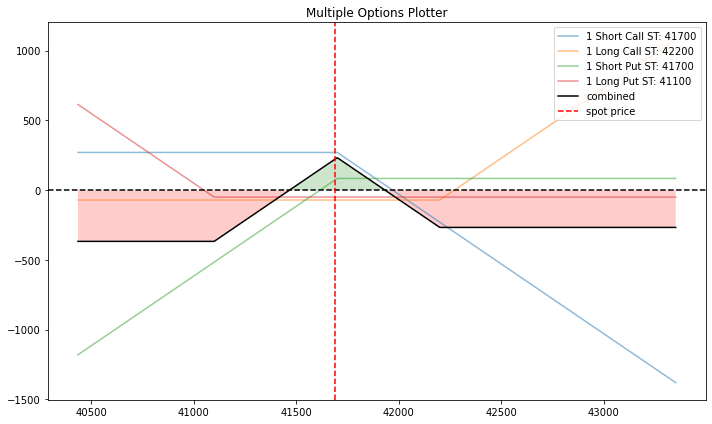

In [18]:

op1={'op_type': 'c', 'strike': 41700, 'tr_type': 's', 'op_pr': 270.00}
op2={'op_type': 'c', 'strike': 42200, 'tr_type': 'b', 'op_pr': 71.00}
op3={'op_type': 'p', 'strike': 41700, 'tr_type': 's', 'op_pr': 83.65}
op4={'op_type': 'p', 'strike': 41100, 'tr_type': 'b', 'op_pr': 50.15}

op_list=[ op1,op2,op3,op4]
op.multi_plotter(spot=41686.70,spot_range=3, op_list=op_list)

In [84]:
abb = {'c': 'Call',
        'p': 'Put',
        'b': 'Long',
        's': 'Short'}

def check_optype(op_type):
    if (op_type not in ['p', 'c']):
        raise ValueError("Input 'p' for put and 'c' for call!")

def check_trtype( tr_type):
    if (tr_type not in ['b', 's']):
        raise ValueError("Input 'b' for Buy and 's' for Sell!")

def payoff_calculator( x, op_type, strike, op_pr, tr_type, n):
    y = []
    if op_type == 'c':
        for i in range(len(x)):
            y.append(max((x[i] - strike - op_pr), -op_pr))
    else:
        for i in range(len(x)):
            y.append(max(strike - x[i] - op_pr, -op_pr))
    y = np.array(y)

    if tr_type == 's':
        y = -y
    return y * n


def multi_plotter( spot_range=20, spot=100, op_list=[{'op_type': 'c', 'strike': 110, 'tr_type': 's', 'op_pr': 2, 'contract': 1},
                                                          {'op_type': 'p', 'strike': 95, 'tr_type': 's', 'op_pr': 6, 'contract': 1}],
                  save=False, file='fig.png'):
    """
    Plots a basic option payoff diagram for a multiple options and resultant payoff diagram

    Parameters
    ----------
    spot: int, float, default: 100
       Spot Price

    spot_range: int, float, optional, default: 20
       Range of spot variation in percentage

    op_list: list of dictionary

       Each dictionary must contiain following keys
       'strike': int, float, default: 720
           Strike Price
       'tr_type': kind {'b', 's'} default:'b'
          Transaction Type>> 'b': long, 's': short
       'op_pr': int, float, default: 10
          Option Price
       'op_type': kind {'c','p'}, default:'c'
          Opion type>> 'c': call option, 'p':put option
       'contracts': int default:1, optional
           Number of contracts

    save: Boolean, default False
        Save figure

    file: String, default: 'fig.png'
        Filename with extension

    Example
    -------
    op1={'op_type':'c','strike':110,'tr_type':'s','op_pr':2,'contract':1}
    op2={'op_type':'p','strike':95,'tr_type':'s','op_pr':6,'contract':1}

    import opstrat  as op
    op.multi_plotter(spot_range=20, spot=100, op_list=[op1,op2])

    #Plots option payoff diagrams for each op1 and op2 and combined payoff

    """
    x = spot * np.arange(100 - spot_range, 101 + spot_range, 0.01) / 100
    y0 = np.zeros_like(x)

    y_list = []
    for op in op_list:
        op_type = (op['op_type']).lower()
        tr_type = (op['tr_type']).lower()
        check_optype(op_type)
        check_trtype(tr_type)

        strike = op['strike']
        op_pr = op['op_pr']
        try:
            contract = op['contract']
        except:
            contract = 1
        y_list.append(payoff_calculator(x, op_type, strike, op_pr, tr_type, contract))
    
#     return y_list

    def plotter():
        y = 0
        plt.figure(figsize=(10, 6))
        for i in range(len(op_list)):
            try:
                contract = str(op_list[i]['contract'])
            except:
                contract = '1'

            label = contract + ' ' + str(abb[op_list[i]['tr_type'].lower()]) + ' ' + str(
                abb[op_list[i]['op_type'].lower()]) + ' ST: ' + str(op_list[i]['strike'])
            sns.lineplot(x=x, y=y_list[i], label=label, alpha=0.5)
            y += np.array(y_list[i])
            
        #For findinf max profit and loss 
        #MaxProfit
        ml=[]
        for i in y_list:
            ml.append(max(i))
            ml.append(min(i))
            
        maxprofit=max(y)
        maxloss=min(y)
        RiskReward=round(-maxloss/maxprofit,2)
        
            
        if (maxprofit == y[-1] and y[-1]>y[-2]) or (maxprofit == y[0] and y[0]>y[1]):
            maxprofit = "Unlimited"

        if (maxloss == y[-1] and y[-1]<y[-2]) or (maxloss == y[0] and y[0]<y[1]):
            maxloss="Unlimited"

#         if maxprofit>=max(ml):
#             maxprofit="Unlimited"
        
#         if maxloss<=min(ml):
#             maxloss="Unlimited"

        sns.lineplot(x=x, y=y, label='combined', alpha=1, color='k')
        sns.lineplot(x=x, y=y, label="Maxprofit: "+str(maxprofit), alpha=0.01, color='k',linestyle='--')
        sns.lineplot(x=x, y=y, label="MaxLoss: "+str(maxloss), alpha=0.01, color='k',linestyle='--')
        sns.lineplot(x=x, y=y, label="RiskReward: "+str(RiskReward), alpha=0.01, color='k',linestyle='--')
        plt.axhline(color='k', linestyle='--')
        plt.axvline(x=spot, color='r', linestyle='--', label='spot price')
        plt.legend()
        plt.legend(loc='upper right')
        title = "Multiple Options Plotter"
        plt.title(title)
        plt.fill_between(x, y, 0, alpha=0.2, where=y > y0, facecolor='green', interpolate=True)
        plt.fill_between(x, y, 0, alpha=0.2, where=y < y0, facecolor='red', interpolate=True)
        plt.tight_layout()
        if save == True:
            plt.savefig(file)
        plt.show()

    plotter()

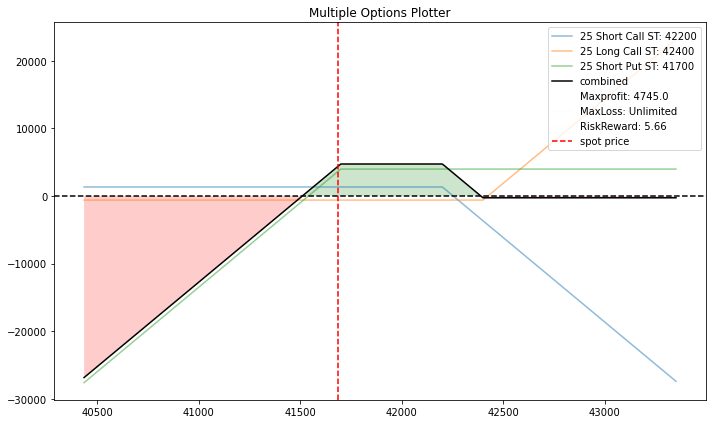

In [87]:

Index="BANKNIFTY"
Expiry="2022-11-10"
strike1= 42200
strike2= 42400
strike3= 41700
strike4= 41500
op_list=[
    {'op_type': 'C', 'strike': strike1, 'tr_type': 'S', 'op_pr': CallPrice(strike1,df),'contract': 25},
    {'op_type': 'C', 'strike': strike2, 'tr_type': 'B', 'op_pr': CallPrice(strike2,df),'contract': 25},
    {'op_type': 'P', 'strike': strike3, 'tr_type': 'S', 'op_pr': PutPrice(strike3,df),'contract': 25},
#     {'op_type': 'P', 'strike': strike4, 'tr_type': 'B', 'op_pr': PutPrice(strike4,df),'contract': 25}
]
multi_plotter(spot=41686.70,spot_range=3, op_list=op_list)

In [19]:
K = 18400
St=18202.80
v =11.51
r =10
t = 1
type="c"

In [41]:
a=op.black_scholes(K = 18400,St=18202.80,v =12.6,r =10,t =2,type="p")

In [42]:
a["greeks"]

{'delta': -0.8625546611298462,
 'gamma': 0.00129465664599654,
 'theta': -4.973188424327878,
 'vega': 2.96168370689839,
 'rho': -0.8712230504804097}

In [20]:
op.blackscholes(K = 18400,St=18202.80,v =11.51,r =10,t = 1,type="c")

TypeError: 'module' object is not callable

In [151]:
ml=[]
for i in a:
    ml.append(max(i))
    ml.append(min(i))


In [152]:
ml

[1775.0,
 -26974.983250037258,
 5257.5,
 -26340.02499999995,
 23222.52499999995,
 -3375.0]

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1